In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
def load_preprocess_data():
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    train_labels = train_labels.flatten()
    test_labels = test_labels.flatten()

    # Define classes that can fly (1) and cannot fly (0)
    can_fly = [0, 2]  # airplane, bird
    cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # all other classes

    # Create binary labels for the new task
    train_labels = np.array([1 if label in can_fly else 0 for label in train_labels])
    test_labels = np.array([1 if label in can_fly else 0 for label in test_labels])

    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    return train_images, train_labels, test_images, test_labels

# Load and preprocess the data
train_images, train_labels, test_images, test_labels = load_preprocess_data()


170498071/170498071 [==============================] - 11s 0us/step


In [4]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Build the model
model = build_model()


In [5]:
def compile_and_train_model(model, train_images, train_labels, test_images, test_labels):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))
    return history

# Compile and train the model
history = compile_and_train_model(model, train_images, train_labels, test_images, test_labels)


Epoch 1/10
1563/1563 [==============================] - 74s 46ms/step - loss: 0.4069 - accuracy: 0.8290 - val_loss: 0.3844 - val_accuracy: 0.8499
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.3378 - accuracy: 0.8611 - val_loss: 0.3315 - val_accuracy: 0.8673
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.3075 - accuracy: 0.8755 - val_loss: 0.3014 - val_accuracy: 0.8753
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.2806 - accuracy: 0.8864 - val_loss: 0.2872 - val_accuracy: 0.8848
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.2591 - accuracy: 0.8955 - val_loss: 0.2786 - val_accuracy: 0.8868
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.2349 - accuracy: 0.9070 - val_loss: 0.2770 - val_accuracy: 0.8909
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.2160 - accuracy: 0.9138 - val_loss: 0.2987 -

313/313 [==============================] - 10s 30ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      8000
           1       0.78      0.67      0.72      2000

    accuracy                           0.90     10000
   macro avg       0.85      0.81      0.83     10000
weighted avg       0.89      0.90      0.89     10000

Confusion Matrix:


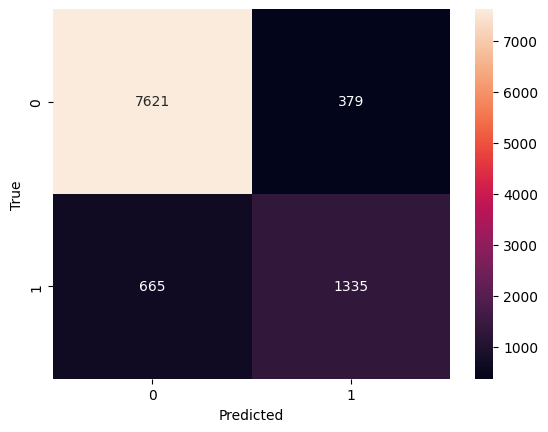

In [6]:
def evaluate_model(model, test_images, test_labels):
    predictions = model.predict(test_images)
    predictions = (predictions > 0.5).astype(int)

    print("Classification Report:")
    print(classification_report(test_labels, predictions))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate the model
evaluate_model(model, test_images, test_labels)
